# Elaborazione dei dati pluviometrici della stazione di Cavalese (Convento)

## Autori

- Daniele Girardi [213396]
- Leonardo Motti [208950]

## Indice

Viene presentata l'elaborazione dei dati relativi alla stazione meteorologica di Cavalese (Convento) nel periodo tra il 1962 e il 2002. Tale elaborazione è stata suddivisa nelle seguenti parti:
#### 1) Introduzione
#### 2) Distribuzioni di Gumbel
    2.1) Metodo dei momenti
    2.2) Metodo della massima verosimiglianza
    2.3) Metodo dei minimi quadrati
#### 3) Test di Pearson
#### 4) Curve di possibilità pluviometrica
#

# 1) Introduzione

## Descrizione della stazione meteorologica

La stazione meteorologica si trova in Trentino Alto Adige, più precisimanente in Val di Fiemme, nel comune di Cavalese (TN). 
Tale stazione è collocata ad una quota di 1000 metri s.l.m. e alle coordinate geografiche 46°17'28'' N 11°27'33'' E. Questo sito di misura attualmente non è funzionante in quanto è stato dismesso in data 12/06/2006 ed è contraddistinto dal codice T0107.

### Foto della stazione

S'inserisce la fotografia del sito di misura.

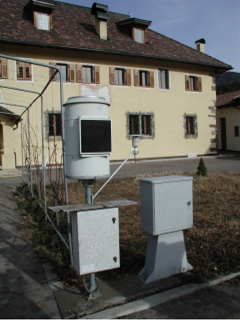

In [2]:
import os
from IPython.display import Image
percorso_dati_pluviometrici = os.path.dirname(os.getcwd())
Image(percorso_dati_pluviometrici + "/curve possibilità pluviometrica/fotoStazione.png")

## Caricamento delle librerie

Vengono caricate le librerie necessarie all'importazione, al trattamento e alla visualizzazione dei dati.

In [3]:
from pandas import *
import pandas as pd
import numpy as np
from numpy import linspace
import datetime as datetime
import matplotlib.pyplot as plt
import math
from scipy.stats import genextreme, gumbel_r
from statsmodels.distributions.empirical_distribution import ECDF

## Caricamento e visualizzazione dei dati

In [4]:
os.chdir(percorso_dati_pluviometrici+'/curve possibilità pluviometrica')
os.listdir()

['.ipynb_checkpoints',
 '1)Introduzione.ipynb',
 'fotoStazione.png',
 'LetturaFileExcel.ipynb',
 'MassimiDiPrecipCavalese.xls',
 'MassimiDiPrecipitazione.xls',
 'massimiDiPrecipitazioneCavalese.xls']

Selezionare il file contenente i dati relativi ai massimi di precipitazione ('MassimiDiPrecipCavalese') e convertirlo in un dataframe in modo da poterlo leggere.

In [5]:
data = pd.ExcelFile('MassimiDiPrecipCavalese.xls')
data
data.sheet_names
df = data.parse('DATI', header = 2)
# Prendere il dataframe (df) e porre come indice l'anno
df.columns
df.rename(columns = {'anno':'Anno'}, inplace = True)
df.set_index("Anno", inplace = True)
df.head()

,1 ora,3 ore,6 ore,12 ore,24 ore
Anno,,,,,
1962,24.0,41.6,42.8,42.8,60.5
1963,10.4,15.0,18.8,32.0,35.8
1964,28.6,34.8,38.4,40.0,56.4
1965,18.8,30.2,31.0,35.2,39.2
1966,21.0,22.0,33.0,59.6,102.2


Si plottano i massimi di precipitazione nel corso degli anni relativi ai dati della stazione.

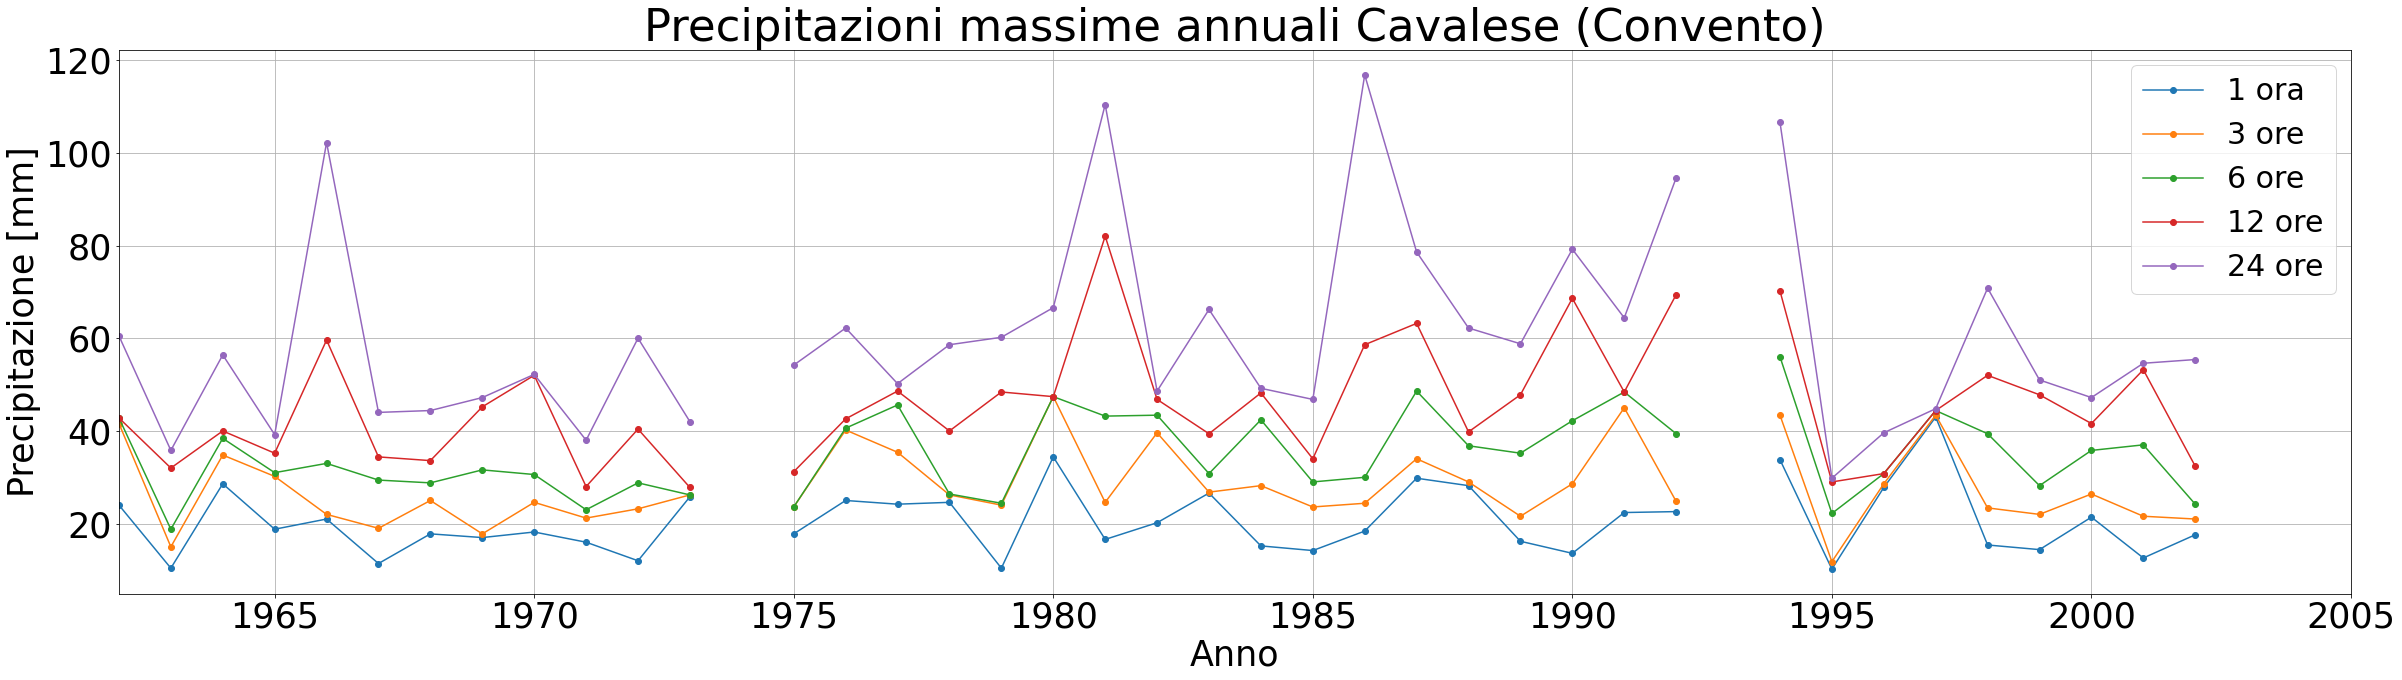

In [7]:
ax = df.plot(style = '-o', figsize = (40,10))
ax.set_title('Precipitazioni massime annuali Cavalese (Convento)', fontsize = 45)
plt.legend(prop = {'size':30})
plt.xlabel('Anno', fontsize = 35)
plt.ylabel('Precipitazione [mm]', fontsize = 35)
plt.rc('xtick', labelsize = 35)
plt.rc('ytick', labelsize = 35)
ax.set_xbound(lower = 1962, upper = 2005)
plt.grid()

Si osserva che la serie temporale presenta mancanze di dati (NaN) negli anni 1974 e 1993

## Analisi preliminari dei dati

Si valutano preliminarmente i dati tramite un'analisi statistica.

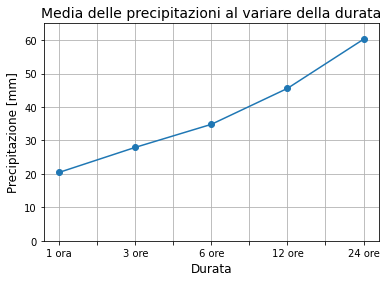

In [9]:
#Calcolo della media
media = df.mean()
md = media.plot(style = '-o') 
md.grid(True) 
md.set_title('Media delle precipitazioni al variare della durata', fontsize = 14)
md.set_xlabel('Durata', fontsize = 12)
md.set_ylabel('Precipitazione [mm]', fontsize = 12) 
plt.rc('xtick', labelsize = 10)
plt.rc('ytick', labelsize = 10)
md.set_ybound(lower = 0, upper = 65)

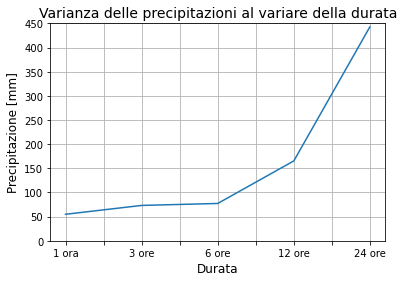

In [10]:
#Calcolo della varianza
varianza = df.var()
vr = varianza.plot()  
vr.grid(True)
vr.set_title('Varianza delle precipitazioni al variare della durata', fontsize = 14)
vr.set_xlabel('Durata', fontsize = 12) 
vr.set_ylabel('Precipitazione [mm]', fontsize = 12) 
plt.rc('xtick', labelsize = 10)
plt.rc('ytick', labelsize = 10)
vr.set_ybound(lower = 0, upper = 450)

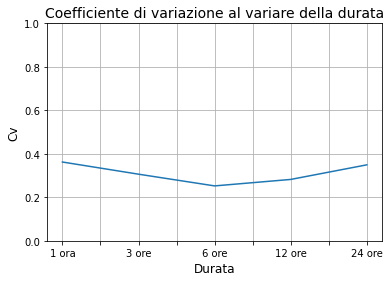

In [11]:
#Calcolo del coefficiente di variazione -> deviazione standard / media
devStandard = df.std()
coeffVar = devStandard/media
cv = coeffVar.plot()  
cv.grid(True)
cv.set_title('Coefficiente di variazione al variare della durata', fontsize = 14)
cv.set_xlabel('Durata',fontsize = 12) 
cv.set_ylabel('Cv', fontsize = 12) 
plt.rc('xtick', labelsize = 10)
plt.rc('ytick', labelsize = 10)
cv.set_ybound(lower = 0, upper = 1)

Si può notare che i dati sono di buona qualità poichè hanno un coefficiente di variazione contenuto